# Data/Research Analyst Intern Assignment on Financial Data.
## Submitted by OGUINYE EMEKA GAVIN.


Here: the Dataset was created with 'randomization' at every run, converted to a data frame and saved to an excel file named "mock_data".


In [4]:
import pandas as pd
import random

In [5]:
# Creating a sample dataset
data = {
    "Month": pd.date_range(start="2024-01-01", periods=12, freq="M").strftime("%b-%Y"),
    "Expense Category": random.choices(
        ["Operations", "Marketing", "Research", "IT"], k=12
    ),
    "Amount": [random.randint(10000, 50000) for _ in range(12)],
    "Region": random.choices(["North", "South", "East", "West"], k=12),
    "Sales": [random.randint(50000, 150000) for _ in range(12)],
    "Type": random.choices(["AP", "AR"], k=12),
    "Aging Bucket": random.choices(
        ["0-30 days", "31-60 days", "61-90 days", "90+ days"], k=12
    ),
}

C:\Users\VICTORY\AppData\Local\Temp\ipykernel_8676\2149984768.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2024-01-01", periods=12, freq="M").strftime("%b-%Y"),


### Spliting Scripts to avoid frequent randomization and altering of dataset while working on the notebook

In [6]:
# Converting to a DataFrame named "df"
df = pd.DataFrame(data)

# Saving to an Excel file named "mock data"
df.to_excel("mock_data.xlsx", index=False)

# Displaying the DataFrame
print(df)

       Month Expense Category  Amount Region   Sales Type Aging Bucket
0   Jan-2024       Operations   11139   West   56984   AR   61-90 days
1   Feb-2024         Research   15463  North  109153   AR    0-30 days
2   Mar-2024       Operations   12031  North  139829   AP   31-60 days
3   Apr-2024        Marketing   11302  South   60326   AP    0-30 days
4   May-2024       Operations   31400   East   62520   AR    0-30 days
5   Jun-2024       Operations   26148  North  133811   AP     90+ days
6   Jul-2024         Research   20129  North   63431   AR     90+ days
7   Aug-2024        Marketing   31595  South  144298   AP    0-30 days
8   Sep-2024        Marketing   37319   East   84369   AR   31-60 days
9   Oct-2024               IT   16748  South   80060   AR    0-30 days
10  Nov-2024               IT   28784  North  103202   AP   31-60 days
11  Dec-2024               IT   16083   West  129222   AP   31-60 days


# Data Exploration
## What is the above dataset made of?
The Above Dataset is a Financial Data in 2024, that is structured timely across the 12 months, and is a combination of both categorical and Numerical data ('Amount' and 'Sales', of which the rest are categorical). From this dataset, we can Check the trend Analysis, Performance Evaluation, Risk Assessement, etc. Generally speaking, I'd say that the data set is "Cleaned" because there are no duplicates, missing values, and the data types are correct accross the rows and columns.

We can explore trhe details in the dataset in different charts as follows:

# Visualization 1
Plotting the overall Expenses Versus the Sales, over Time period of 12 months.

This chart helps us to see the general behaviour of the sales and expenses as time goes by over the period of a year. 

We can see that the sales are generally higher than the expenses, but the gap is changing over time. This might be due to the fluctuations in the business or changes in the market.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

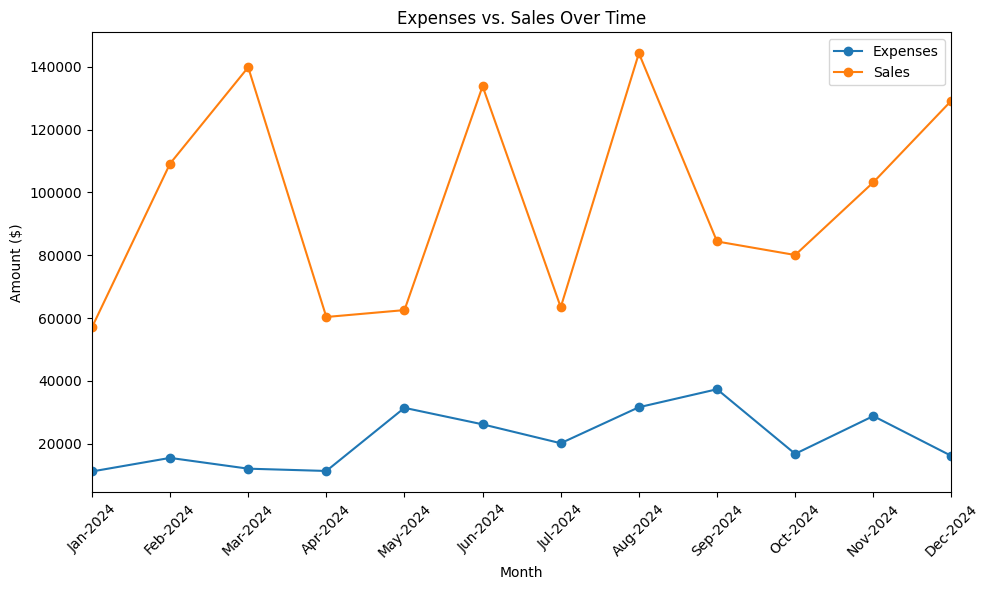

In [86]:
# Assuming that df['Month'] is already in datetime format, we have:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%Y')

# Grouping by 'Month' and summing 'Amount' and 'Sales' we have:
pivot = df.groupby('Month').sum()[['Amount', 'Sales']]

# Sorting the pivot table by 'Month'
pivot = pivot.sort_index()

# Ensuring that all months are represented, even if missing in the data, we have:
all_months = pd.date_range('2024-01-01', '2024-12-01', freq='MS')
pivot = pivot.reindex(all_months, fill_value=0)  # Fill missing months with "0" if there exists

# Plotting the data using a line chart, setting the size, giving it a title and labelling both the x and y axis respectivelly, we have:
pivot.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Expenses vs. Sales Over Time")
plt.ylabel("Amount ($)")
plt.xlabel("Month")

# Setting the x-axis ticks for all months from January to December, we have:
plt.xticks(all_months, all_months.strftime('%b-%Y'), rotation=45)

# Definig the Chart legend, we have:
plt.legend(["Expenses", "Sales"])
plt.tight_layout()
plt.show()

# Visualization 2
Plotting the overall Expenses by the expense category.

This chart would help us see the Amount of expenses incurred by each category.



In [36]:
import seaborn  as sns
import matplotlib.pyplot as plt

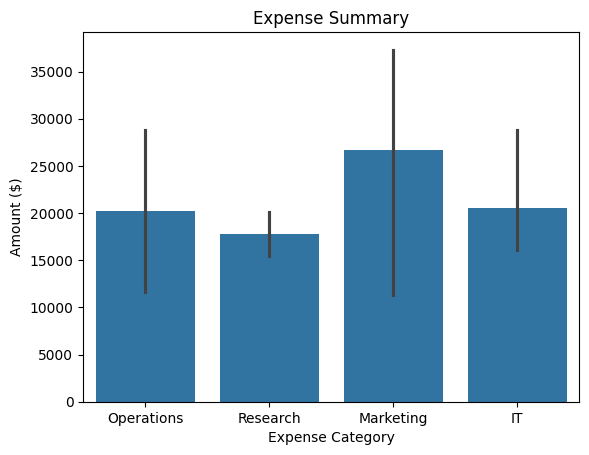

In [88]:
sns.barplot(x='Expense Category', y='Amount', data=df)
plt.title('Expense Summary')
plt.ylabel("Amount ($)")
plt.show()

# Visualization 3
Plotting the AR (Account Recievable) and AP (Account Payable) Aging Analysis.

AP Aging is a breakdown of the company's unpaid bills or amounts it owes to suppliers/vendors, organized by the time they have been outstanding. It helps the company manage cash flow by tracking how long they’ve owed money and ensuring payments are made on time to avoid late fees or damaged supplier relationships. 

AR Aging is a breakdown of the money owed to the company by its customers, also organized by how long the payments have been outstanding. It helps monitor customer payments, identify overdue accounts, and manage credit risk.



Index(['Month', 'Expense Category', 'Amount', 'Region', 'Sales', 'Type',
       'Aging Bucket'],
      dtype='object')


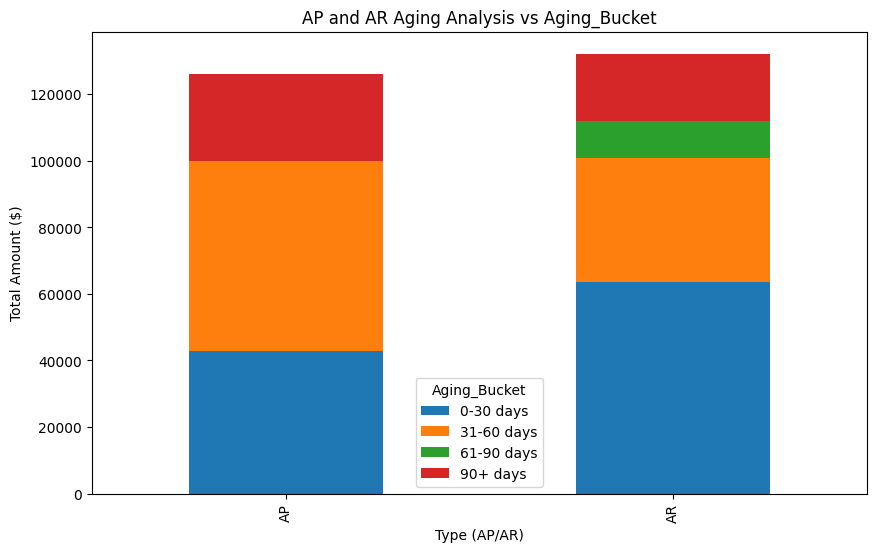

In [89]:
print(df.columns)  # Verifying the column names
df.rename(columns={'Aging Bucket': 'Aging_Bucket'}, inplace=True)  # Renaming the column

# Now, performing the groupby operation, we have
aging = df.groupby(['Type', 'Aging_Bucket'])['Amount'].sum().unstack()
aging.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title for visualization, we have:
plt.title("AP and AR Aging Analysis vs Aging_Bucket")
plt.ylabel("Total Amount ($)")
plt.xlabel("Type (AP/AR)")
plt.show()



# Visualization 4
Ploting the Total sales and expenses by the region. 
This would help us to see clearly, the distribution of sales and expenses amounts accross the regions.

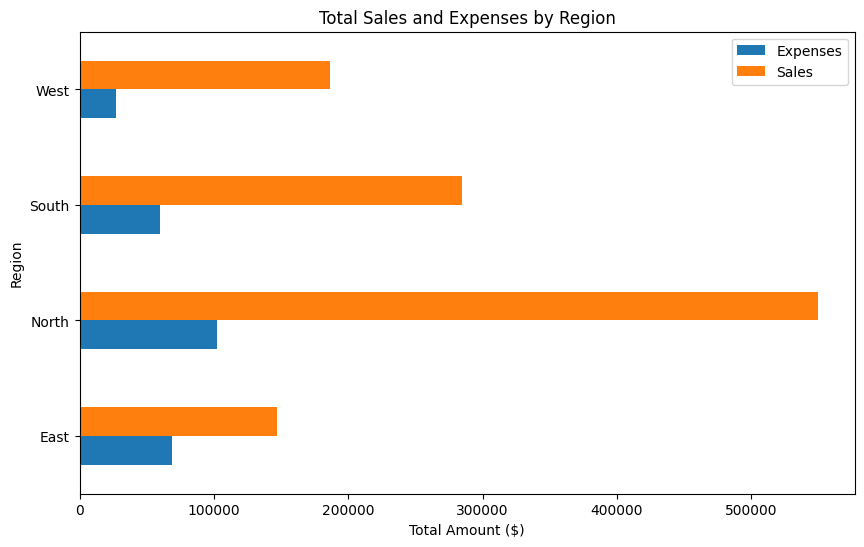

In [90]:
# Filtering only numeric columns to avoid issues with non-numeric data for summation purposes, we have:
numeric_columns = ['Amount', 'Sales']  
region = df.groupby('Region')[numeric_columns].sum()  # Here, we are Performing summation only on numeric columns

# Now, Plotting the grouped data, we have:
region.plot(kind='barh', figsize=(10, 6))
plt.title("Total Sales and Expenses by Region")
plt.xlabel("Total Amount ($)")
plt.ylabel("Region")
plt.legend(["Expenses", "Sales"])
plt.show()



# Visualization 5
Ploting the AR vs. AP, over the period of 12 months time.

This would help us to see clearly how the accounts payable and the accounts recievable is changing over time

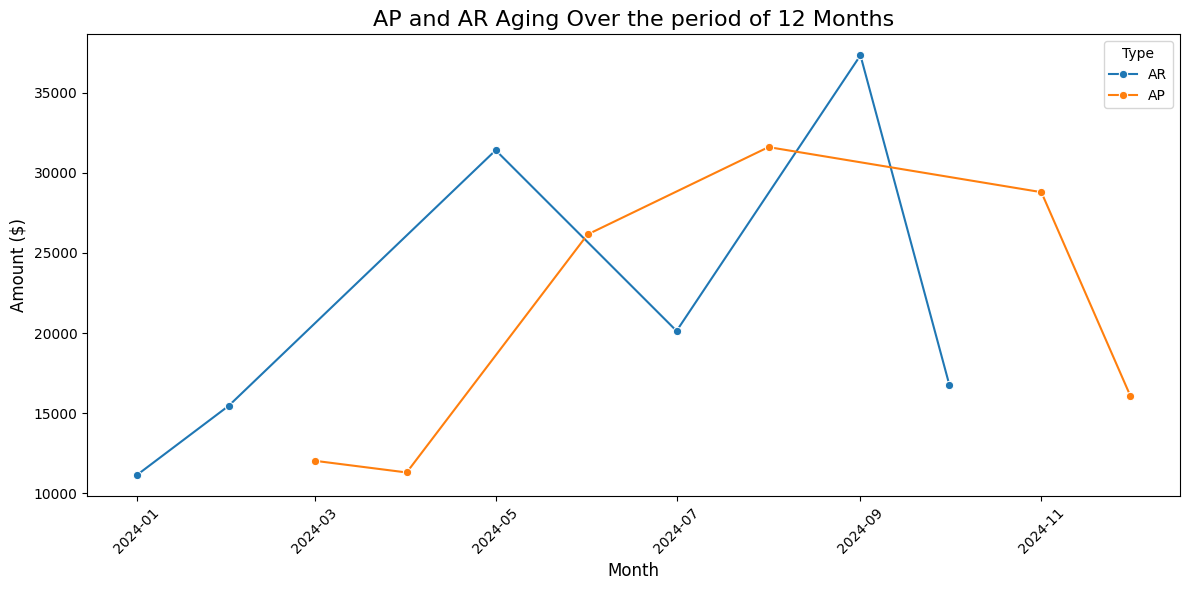

In [91]:
plt.figure(figsize=(12, 6))

# Plotting the line chart with markers for each data point, we have:
sns.lineplot(x='Month', y='Amount', hue='Type', data=df, marker='o')

# Formating the x-axis to properly display month labels, we have:
plt.xticks(rotation=45, fontsize=10)

# Adding a title and labels
plt.title('AP and AR Aging Over the period of 12 Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Dataframe for Dashboard

In [93]:
# displaying the dataset we have been using, we have:
print (df)

        Month Expense Category  Amount Region   Sales Type Aging_Bucket
0  2024-01-01       Operations   11139   West   56984   AR   61-90 days
1  2024-02-01         Research   15463  North  109153   AR    0-30 days
2  2024-03-01       Operations   12031  North  139829   AP   31-60 days
3  2024-04-01        Marketing   11302  South   60326   AP    0-30 days
4  2024-05-01       Operations   31400   East   62520   AR    0-30 days
5  2024-06-01       Operations   26148  North  133811   AP     90+ days
6  2024-07-01         Research   20129  North   63431   AR     90+ days
7  2024-08-01        Marketing   31595  South  144298   AP    0-30 days
8  2024-09-01        Marketing   37319   East   84369   AR   31-60 days
9  2024-10-01               IT   16748  South   80060   AR    0-30 days
10 2024-11-01               IT   28784  North  103202   AP   31-60 days
11 2024-12-01               IT   16083   West  129222   AP   31-60 days


In [94]:
#Create Dataframe
df = pd.DataFrame(data)

#Grouping By Expense Category and Caluclate Sum of Amount
grouped_df = df.groupby("Expense Category")["Amount"].sum().reset_index()

print(grouped_df)

  Expense Category  Amount
0               IT   61615
1        Marketing   80216
2       Operations   80718
3         Research   35592


In [96]:
# Group by Expense Category
expense_summary = df.groupby("Expense Category")["Amount"].sum().reset_index()

# Display summary
print("Expense Summary:")
print(expense_summary)


Expense Summary:
  Expense Category  Amount
0               IT   61615
1        Marketing   80216
2       Operations   80718
3         Research   35592


In [97]:
# Group by Region
sales_summary = df.groupby("Region")["Sales"].sum().reset_index()

# Disp=lay summary
print("Sales Summary:")
print(sales_summary)


Sales Summary:
  Region   Sales
0   East  146889
1  North  549426
2  South  284684
3   West  186206


In [98]:
# Calculate AP Due: Type = 'AP' and Aging Bucket = '0-30 days'
ap_due = df[(df['Type'] == 'AP') & (df['Aging Bucket'] == '0-30 days')]['Amount'].sum()

# Calculate AR Due: Type = 'AR' and Aging Bucket = '0-30 days'
ar_due = df[(df['Type'] == 'AR') & (df['Aging Bucket'] == '0-30 days')]['Amount'].sum()

# Calculate AP Past Due: Type = 'AP' and Aging Bucket not '0-30 days'
ap_past_due = df[(df['Type'] == 'AP') & (df['Aging Bucket'] != '0-30 days')]['Amount'].sum()

# Calculate AR Past Due: Type = 'AR' and Aging Bucket not '0-30 days'
ar_past_due = df[(df['Type'] == 'AR') & (df['Aging Bucket'] != '0-30 days')]['Amount'].sum()

# Create a DataFrame for AP and AR summary
ap_ar_data = pd.DataFrame({
    "Category": ["AP Due", "AR Due", "AP Past Due", "AR Past Due"],
    "Amount": [ap_due, ar_due, ap_past_due, ar_past_due]
})

# Display the summary
print(ap_ar_data)


      Category  Amount
0       AP Due   42897
1       AR Due   63611
2  AP Past Due   83046
3  AR Past Due   68587


## Bringing other Charts into the dashboards:

In [46]:
# Install required libraries
%pip install dash pandas plotly flask-ngrok

# Import libraries
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from flask_ngrok import run_with_ngrok
import plotly.graph_objs as go


In [99]:
# Provided data for your dashboard
df = pd.DataFrame({
    "Month": ["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01", 
              "2024-06-01", "2024-07-01", "2024-08-01", "2024-09-01", "2024-10-01", 
              "2024-11-01", "2024-12-01"],
    "Expense Category": ["Marketing", "Operations", "Research", "IT", "Marketing", 
                         "IT", "IT", "Marketing", "IT", "Operations", "Marketing", "Operations"],
    "Amount": [11139, 11139, 12031, 11302, 31400, 26148, 20129, 31595, 37319, 16748, 28784, 16083],
    "Region": ["South", "East", "North", "North", "North", "North", "West", "South", "East", "West", "West", "East"],
    "Sales": [56984, 109153, 139829, 60326, 62520, 133811, 63431, 144298, 84369, 80060, 103202, 129222],
    "Type": ["AR", "AP", "AP", "AR", "AP", "AR", "AP", "AP", "AR", "AP", "AP", "AR"],
    "Aging Bucket": ["31-60 days", "61-90 days", "0-30 days", "31-60 days", "90+ days", 
                     "90+ days", "61-90 days", "90+ days", "61-90 days", "61-90 days", 
                     "90+ days", "61-90 days"]
})

In [101]:
# Expense Summary Data (for previous charts)
expense_data = pd.DataFrame({
    "Expense Category": ["IT", "Marketing", "Operations", "Research"],
    "Amount": [61615, 80216, 80718, 35592]
})

In [102]:
# Sales Data (for previous charts)
sales_data = pd.DataFrame({
    "Region": ["East", "North", "South", "West"],
    "Sales": [146889, 549426, 284684, 186206]
})

In [103]:
# AP and AR Data (for previous charts)
ap_ar_data = pd.DataFrame({
    "Category": ["AP Due", "AR Due", "AP Past Due", "AR Past Due"],
    "Amount": [42897, 63611, 83046, 68587]
})

In [104]:
# Initialize the Dash app
app = Dash(__name__)
run_with_ngrok(app.server)  # Integrate ngrok for external access

# Incorporating other Charts to the Main Dashboard.

In [105]:
# Expenses vs Sales Over Time
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')
pivot = df.groupby('Month').sum()[['Amount', 'Sales']]
pivot = pivot.sort_index()
all_months = pd.date_range('2024-01-01', '2024-12-01', freq='MS')
pivot = pivot.reindex(all_months, fill_value=0)
fig_expenses_sales = go.Figure()
fig_expenses_sales.add_trace(go.Scatter(x=pivot.index, y=pivot['Amount'], mode='lines+markers', name='Expenses'))
fig_expenses_sales.add_trace(go.Scatter(x=pivot.index, y=pivot['Sales'], mode='lines+markers', name='Sales'))
fig_expenses_sales.update_layout(title="Expenses vs Sales Over Time", xaxis_title="Month", yaxis_title="Amount ($)")


In [106]:
# Expense Summary (Barplot)
fig_expense_summary = go.Figure(data=[go.Bar(x=expense_data['Expense Category'], y=expense_data['Amount'])])
fig_expense_summary.update_layout(title='Expense Summary', yaxis_title="Amount ($)")


In [107]:
# AP and AR Aging Analysis vs Aging Bucket (Barplot)
aging = df.groupby(['Type', 'Aging Bucket'])['Amount'].sum().unstack()
fig_aging_analysis = go.Figure(data=[go.Bar(x=aging.index, y=aging[col], name=col) for col in aging.columns])
fig_aging_analysis.update_layout(title="AP and AR Aging Analysis vs Aging Bucket", xaxis_title="Type (AP/AR)", yaxis_title="Total Amount ($)")

In [108]:
# Total Sales and Expenses by Region (Barh)
region = df.groupby('Region')[['Amount', 'Sales']].sum().reset_index()
fig_sales_expenses_region = go.Figure(data=[
    go.Bar(y=region['Region'], x=region['Amount'], orientation='h', name='Expenses'),
    go.Bar(y=region['Region'], x=region['Sales'], orientation='h', name='Sales')
])
fig_sales_expenses_region.update_layout(title="Total Sales and Expenses by Region", xaxis_title="Total Amount ($)", yaxis_title="Region")

In [109]:
# AR vs. AP Over 12 Months (Line Plot)
df_ap_ar = df[df['Type'].isin(['AP', 'AR'])]
df_ap_ar_grouped = df_ap_ar.groupby([df_ap_ar['Month'].dt.strftime('%b-%Y'), 'Type'])['Amount'].sum().unstack().fillna(0)
fig_ar_ap_monthly = go.Figure()
fig_ar_ap_monthly.add_trace(go.Scatter(x=df_ap_ar_grouped.index, y=df_ap_ar_grouped['AP'], mode='lines+markers', name='AP'))
fig_ar_ap_monthly.add_trace(go.Scatter(x=df_ap_ar_grouped.index, y=df_ap_ar_grouped['AR'], mode='lines+markers', name='AR'))
fig_ar_ap_monthly.update_layout(title="AR vs. AP Over 12 Months", xaxis_title="Month", yaxis_title="Amount ($)")

# Designing the Dashboard Layout

In [110]:

# Layout of the dashboard
app.layout = html.Div([
    html.H1("CFO Dashboard", style={"textAlign": "center"}),

    # Row 1: Expenses and Sales Summary
    html.Div([
        html.Div([  # Expense Summary Chart
            html.H3("Expense Summary"),
            dcc.Graph(
                id="expense-chart",
                figure=px.bar(expense_data,
                              x="Expense Category",
                              y="Amount",
                              title="Expense Summary",
                              color="Expense Category",
                              text="Amount")
            )
        ], style={"width": "48%", "display": "inline-block"}),

        html.Div([  # Sales Summary Chart
            html.H3("Sales Summary"),
            dcc.Graph(
                id="sales-chart",
                figure=px.pie(sales_data,
                              names="Region",
                              values="Sales",
                              title="Sales by Region",
                              hole=0.4)
            )
        ], style={"width": "48%", "display": "inline-block"}),
    ]),

    # Row 2: AP and AR Aging Summary
    html.Div([
        html.H3("AP and AR Aging Summary"),
        dcc.Graph(
            id="ap-ar-chart",
            figure=px.bar(ap_ar_data,
                          x="Category",
                          y="Amount",
                          title="AP and AR Aging",
                          color="Category",
                          text="Amount")
        )
    ]),

    # Row 3: New Charts
    html.Div([  # Expenses vs Sales Over Time Chart
        html.H3("Expenses vs Sales Over Time"),
        dcc.Graph(id="expenses-sales-chart", figure=fig_expenses_sales)
    ], style={"width": "100%", "marginBottom": "20px"}),

html.Div([  # Container for both charts on the same row
    html.Div([  # Expense Summary (Barplot)
        html.H3("Expense Summary (Barplot)"),
        dcc.Graph(id="expense-summary-chart", figure=fig_expense_summary)
    ], style={"width": "48%", "marginBottom": "20px"}),

    html.Div([  # AP and AR Aging Analysis vs Aging Bucket
        html.H3("AP and AR Aging Analysis vs Aging Bucket"),
        dcc.Graph(id="aging-analysis-chart", figure=fig_aging_analysis)
    ], style={"width": "48%", "marginBottom": "20px"})
], style={"display": "flex", "justifyContent": "space-between", "width": "100%"}),


    html.Div([  # Total Sales and Expenses by Region
        html.H3("Total Sales and Expenses by Region"),
        dcc.Graph(id="sales-expenses-region-chart", figure=fig_sales_expenses_region)
    ], style={"width": "100%", "marginBottom": "20px"}),

    html.Div([  # AR vs AP Over 12 Months
        html.H3("AR vs AP Over 12 Months"),
        dcc.Graph(id="ar-ap-monthly-chart", figure=fig_ar_ap_monthly)
    ], style={"width": "100%"})
])

# Run the app
app.run_server()


# INSIGHTS AND RECOMMEDATIONS

### Chart 1: Expense Summary (Bar Plot)
The expense summary highlights that Marketing and Operations have the highest costs, each around $80K, while IT expenses are moderate at approximately $60K. Research, on the other hand, has the lowest expense at about $40K, which is significantly lower than other categories. This suggests varying levels of resource allocation across departments.  

To address these disparities, Marketing and Operations spending should be reviewed to ensure alignment with business objectives and to identify potential cost-saving opportunities. IT expenses should be assessed for efficiency and strategic alignment, with consideration given to optimizing systems or resources. For Research, the low expenditure may hinder innovation and growth; reallocating funds from less critical areas could enhance research initiatives and support long-term success.


### Chart 3: AP and AR Aging Analysis vs Aging Bucket
The analysis shows that Accounts Payable (AP) is heavily concentrated in the "90+ days" bucket, posing a risk of strained vendor relationships and potential penalties. Similarly, Accounts Receivable (AR) is primarily in the "61–90 days" bucket, indicating delays in customer payments. Minimal amounts in the "0–30 days" bucket for both AP and AR reveal inefficiencies in timely transactions.  

To address these issues, AP processes should prioritize clearing overdue accounts to maintain vendor trust. For AR, strengthening credit policies, improving follow-ups, and offering early payment incentives can help reduce payment delays. Additionally, adopting automated tools for AP and AR management will improve process efficiency and ensure timely actions.

### Chart 4: Expenses vs. Sales Over Time
Sales show significant fluctuations, peaking in March, July, and September 2024, with the highest sales in March and the lowest in May. Expenses remain relatively stable, with slight increases in May, July, and November, indicating fixed costs dominate. High profitability is seen in months like March, while narrower margins or potential losses occur in May and October due to reduced sales.  

To address this, replicate successful strategies from peak months to boost sales during low-performing months like May and October. Targeted marketing campaigns can help stabilize revenue. Additionally, evaluate and reduce unnecessary expense increases in months like May and November, and align variable costs with sales performance. Regularly monitor profit margins and use scenario planning to mitigate the impact of sales fluctuations on overall financial health.

### Chart 5 and Chart 6

Expenses are highest in Marketing and Operations (~80K each), with IT at ~60K and Research at ~35K. Accounts Payable (AP) shows significant delays, especially in the 90+ days bucket, while Accounts Receivable (AR) is better managed but still has a notable 61-90 days balance.  

To improve working capital, review AP delays and negotiate better payment terms with vendors, possibly offering early payment discounts. For AR, focus on reducing overdue amounts by incentivizing early payments and setting up automated reminders. Review Marketing and Operations expenses for efficiency and assess if the Research budget is adequate. Ensure IT spending aligns with digital transformation needs. Establish formal AP aging reviews, track aging buckets weekly, create KPIs for AP/AR teams, and consider automating payment processes to prevent delays.



### Chart 7

The North region leads with the highest sales (~400K), followed by the East (~350K), while the West and South regions have significantly lower sales (~200K each). Despite varying sales, all regions maintain similar expense levels (~50-75K). The North region also has the best sales-to-expense ratio, with the West and South regions underperforming relative to their expenses.  

To optimize regional performance, replicate successful strategies from the North region in other areas and explore growth opportunities in the West and South. Review expense structures to ensure resource allocation aligns with sales performance. Develop targeted growth strategies for underperforming regions and consider reallocating marketing budgets based on regional ROI. Implement region-specific KPIs and set growth goals for each region, with regular performance reviews to track progress.



### Chart 8


Both Accounts Payable (AP) and Accounts Receivable (AR) show significant fluctuations throughout the year, with notable spikes in AP during May and August 2024, and a major AR spike in September 2024. There are periods of minimal AR activity, and high AP variability could create cash flow pressure points, especially when large gaps between AR and AP occur.  

To manage cash flow, implement consistent billing cycles to avoid AR gaps and develop a balanced payment schedule to smooth AP spikes. Review billing procedures and investigate the causes of AP spikes to create more predictable cash flow. Consider cash flow forecasts, building reserves, and establishing a line of credit to handle timing mismatches. Additionally, track AR/AP ratios weekly, set maximum thresholds for AP, and improve forecasting tools based on historical data.